# ROC and AUC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![img](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_6.png)

# 위의 F만 사용하여 예시를 진행
- D1은 F의 그림 그래도
- D2는 sample 하나를 홀수 블럭으로 변경 (0.1~0.2)

In [2]:
D1 = [
    # Sample: [probability, label]
    [0.02, 0],
    [0.13, 0],
    [0.16, 0],
    [0.24, 0],
    [0.33, 1],
    [0.47, 1],
    [0.58, 0],
    [0.69, 0],
    [0.97, 1],
    [0.99, 1],
]

D2 = [
    # Sample: [probability, label]
    [0.02, 0],
    [0.13, 1], # 샘플 한 개만 변경
    [0.16, 0],
    [0.24, 0],
    [0.33, 1],
    [0.47, 1],
    [0.58, 0],
    [0.69, 0],
    [0.97, 1],
    [0.99, 1],
]

In [3]:
def prepare_confumat(D):
    num_even = [val[1] for val in D].count(0) # Negative
    num_odd  = [val[1] for val in D].count(1) # Positive
    print(f"m+ : {num_odd}, m- : {num_even}")
    print(f"1/m+ : {1/num_odd:.2f}, 1/m- : {1/num_even:.2f}")
    TPRs, FPRs = [], []
    print('\tthresh\tTP\tFP\tTN\tFN\tTPR\tFPR')
    for thresh in np.linspace(0, 1, len(D)+1):
        TP = [D[i][1] for i in range(len(D)) if D[i][0] > thresh].count(1)
        FP = [D[i][1] for i in range(len(D)) if D[i][0] > thresh].count(0)
        TN = num_even - FP
        FN = num_odd - TP
        TPR = TP / (TP + FN)
        FPR = FP / (TN + FP)
        print(f"thresh: {thresh:6.0%}\t{TP}\t{FP}\t{TN}\t{FN}\t{TPR:.2f}\t{FPR:.2f}")
        TPRs.append(TPR)
        FPRs.append(FPR)
    return TPRs, FPRs

In [4]:
TPRs1, FPRs1 = prepare_confumat(D1)

m+ : 4, m- : 6
1/m+ : 0.25, 1/m- : 0.17
	thresh	TP	FP	TN	FN	TPR	FPR
thresh:     0%	4	6	0	0	1.00	1.00
thresh:    10%	4	5	1	0	1.00	0.83
thresh:    20%	4	3	3	0	1.00	0.50
thresh:    30%	4	2	4	0	1.00	0.33
thresh:    40%	3	2	4	1	0.75	0.33
thresh:    50%	2	2	4	2	0.50	0.33
thresh:    60%	2	1	5	2	0.50	0.17
thresh:    70%	2	0	6	2	0.50	0.00
thresh:    80%	2	0	6	2	0.50	0.00
thresh:    90%	2	0	6	2	0.50	0.00
thresh:   100%	0	0	6	4	0.00	0.00


In [5]:
TPRs2, FPRs2 = prepare_confumat(D2)

m+ : 5, m- : 5
1/m+ : 0.20, 1/m- : 0.20
	thresh	TP	FP	TN	FN	TPR	FPR
thresh:     0%	5	5	0	0	1.00	1.00
thresh:    10%	5	4	1	0	1.00	0.80
thresh:    20%	4	3	2	1	0.80	0.60
thresh:    30%	4	2	3	1	0.80	0.40
thresh:    40%	3	2	3	2	0.60	0.40
thresh:    50%	2	2	3	3	0.40	0.40
thresh:    60%	2	1	4	3	0.40	0.20
thresh:    70%	2	0	5	3	0.40	0.00
thresh:    80%	2	0	5	3	0.40	0.00
thresh:    90%	2	0	5	3	0.40	0.00
thresh:   100%	0	0	5	5	0.00	0.00


In [10]:
def diff(li):
    res = []
    for i, j in zip(li[:-1], li[1:]):
        res.append(j - i)
    return res


def summing(li):
    res = []
    for i, j in zip(li[:-1], li[1:]):
        res.append(j + i)
    return res


def AUC(TPRs, FPRs):
    return np.sum(
        np.array(diff(FPRs[::-1])) * np.array(summing(TPRs[::-1]))
    ) / 2

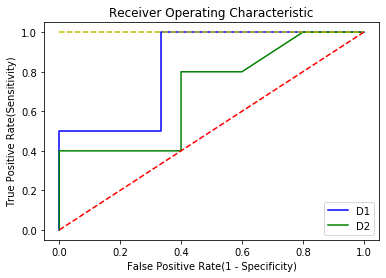

In [11]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(FPRs1, TPRs1, color='b', label='D1')
plt.plot(FPRs2, TPRs2, color='g', label='D2')
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.show()

In [15]:
AUCs = AUC(TPRs1, FPRs1), AUC(TPRs2, FPRs2)
print(f"AUC(D1): {AUCs[0]:.2%}\nAUC(D2): {AUCs[1]:.2%}")

AUC(D1): 83.33%
AUC(D2): 70.00%
